# 绘图和可视化

In [1]:
import numpy as np
import pandas as pd
PERVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
plt.rc('figure', figsize=(10,6))
np.set_printoptions(precision=4, suppress=True)
%matplotlib notebook

## 9.1 matplotlib入门

In [2]:
import matplotlib.pyplot as plt
import numpy as np

data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

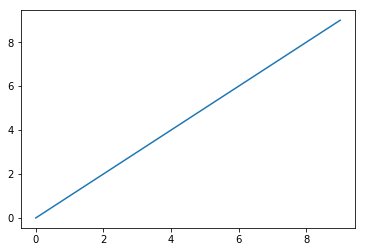

In [3]:
plt.plot(data)

### Figure和Subplot

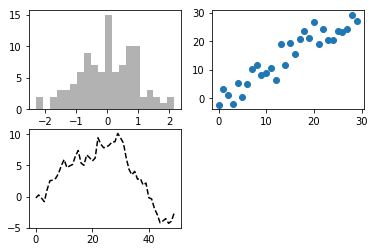

In [4]:
fig = plt.figure()#会弹出一个空窗口
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
plt.plot(np.random.randn(50).cumsum(), 'k--')
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000277D12BF518>,
      dtype=object)

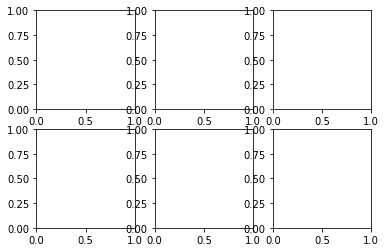

In [5]:
fig, axes = plt.subplots(2,3)
axes

### 调整subplot周围的间距

In [6]:
#利用Figure的subplots_adjust方法可以轻而易举地修改间距，此外，它也是个顶级函数
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
               wspace=None, hspace=None)

<Figure size 432x288 with 0 Axes>

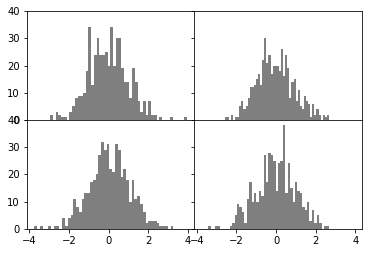

In [7]:
fig, axes = plt.subplots(2,2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0,hspace=0)

### 颜色、标记和线型 

ax.plot(x, y, 'g--') == ax.plot(x, y, linestyle='--', color='g')

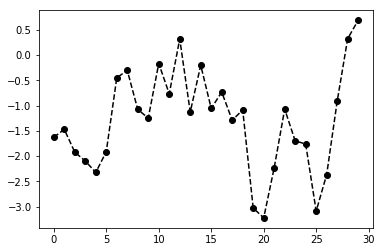

In [8]:
%matplotlib inline
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

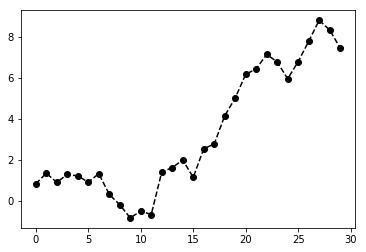

In [9]:
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

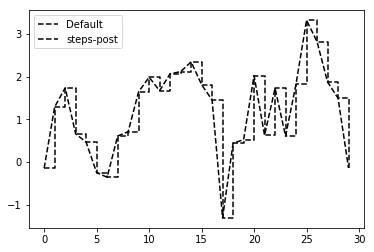

In [10]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')

#在线型图中，非实际数据点默认是按线性方式插值的。可以通过drawstyle选项修改
plt.plot(data, 'k--', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### 刻度、标签和图例

pyplot接口的设计目的就是交互式使用，含有诸如xlim、xticks和xticklabels之类的方法。它们分别控制图表的范围、刻度位置、刻度标签等。使用方式：
- 调用时不带参数，则返回当前的参数值（例如，plt.xlim()返回当前的X轴绘图范围）。
- 调用时带参数，则设置参数值（例如，plt.xlim([0,10])会将X轴的范围设置为0到10）。

所有这些方法都是对当前或最近创建的AxesSubplot起作用的。它们各自对应subplot对象上的两个方法，以xlim为例，就是ax.get_xlim和ax.set_xlim。

### 设置标题、轴标签、刻度以及刻度标签

- 要改变x轴刻度，最简单的办法是使用set_xticks和set_xticklabels。前者告诉matplotlib要将刻度放在数据范围中的哪些位置，默认情况下，这些位置也就是刻度标签。但我们可以通过set_xticklabels将任何其他的值用作标签。
- rotation选项设定x刻度标签倾斜度。
- set_xlabel为X轴设置一个名称。
- set_title设置一个标题

[Text(0.5, 0, 'Stages'), Text(0.5, 1.0, 'My first matplotlib plot')]

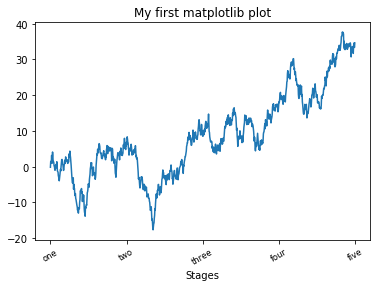

In [11]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one','two','three','four','five'],
                           rotation=30, fontsize='small')
# ax.set_title('My first matplotlib plot')
# ax.set_xlabel('Stages')
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

### 添加图例legend 

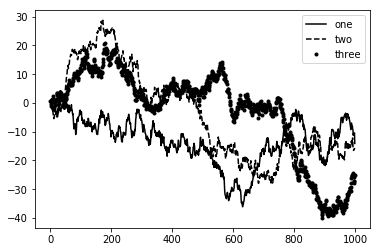

In [12]:
from numpy.random import randn

fig = plt.figure(); ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

### 注释以及在Subplot上绘图 

注解和文字可以通过text、arrow和annotate函数进行添加。text可以将文本绘制在图表的指定坐标(x,y)，还可以加上一些自定义格式。
- ax.annotate方法可以在指定的x和y坐标轴绘制标签。
- set_xlim和set_ylim人工设定起始和结束边界。
- ax.set_title添加图标标题。
- 要在图表中添加一个图形，你需要创建一个块对象shp，然后通过ax.add_patch(shp)将其添加到subplot中。

Text(0.5, 1.0, 'Important dates in the 2008-2009 finacial crisis')

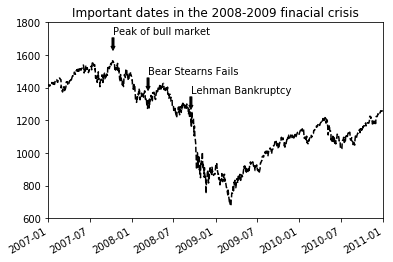

In [13]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

data = pd.read_csv('examples\spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k--')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
               xytext=(date, spx.asof(date) + 225),
               arrowprops=dict(facecolor='black', headwidth=4, width=2,
                              headlength=4),
               horizontalalignment='left', verticalalignment='top')
    
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800]) 

ax.set_title('Important dates in the 2008-2009 finacial crisis')

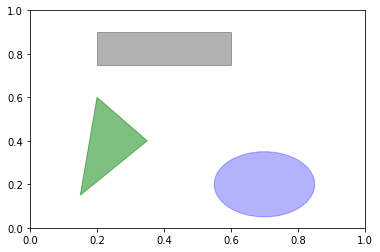

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15],[0.35, 0.4], [0.2, 0.6]],
                  color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 将图表保存到文件 

- 利用plt.savefig可以将当前图表保存到文件。该方法相当于Figure对象的实例方法savefig。
- 发布图片时最常用到两个重要的选项是dpi（控制“每英寸点数”分辨率）和bbox_inches（可以剪除当前图表周围的空白部分）。
- savefig并非一定要写入磁盘，也可以写入任何文件型的对象，比如BytesIO。

In [15]:
plt.savefig('figpath.svg')

<Figure size 432x288 with 0 Axes>

In [16]:
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [17]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

<Figure size 432x288 with 0 Axes>

### matplotlib配置

- matplotlib自带一些配色方案，以及为生成出版质量的图片而设定的默认配置信息。幸运的是，几乎所有默认行为都能通过一组全局参数进行自定义，它们可以管理图像大小、subplot边距、配色方案、字体大小、网格类型等。
- 一种Python编程方式配置系统的方法是使用rc方法。
- rc的第一个参数是希望自定义的对象，如'figure'、'axes'、'xtick'、'ytick'、'grid'、'legend'等。其后可以跟上一系列的关键字参数。一个简单的办法是将这些选项写成一个字典。

In [18]:
plt.rc('figure', figsize=(10,10))

In [19]:
font_options = {'family': 'monospace',
               'weight': 'bold',
               'size': 1}
plt.rc('font', **font_options)

## 9.2 使用pandas和seaborn绘图

- matplotlib实际上是一种比较低级的工具。要绘制一张图表，你组装一些基本组件就行：数据展示（即图表类型：线型图、柱状图、盒形图、散布图、等值线图等）、图例、标题、刻度标签以及其他注解型信息。
- pandas的大部分绘图方法都有一个可选的ax参数，它可以是一个matplotlib的subplot对象。这使你能够在网格布局中更为灵活地处理subplot的位置。
- Seaborn简化了许多常见可视类型的创建。

### 线型图

Series和DataFrame都有一个用于生成各类图表的plot方法。默认情况下，它们所生成的是线型图

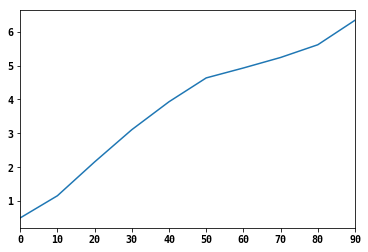

In [21]:
%matplotlib inline
s = pd.Series(np.random.rand(10).cumsum(), index=np.arange(0,100,10))
s.plot()

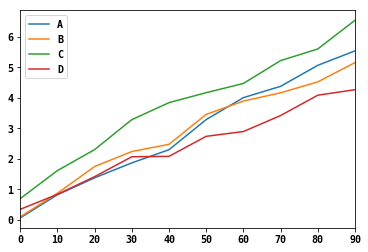

In [22]:
df = pd.DataFrame(np.random.rand(10,4).cumsum(0), columns=['A','B','C','D'],
                 index=np.arange(0,100,10))
df.plot()

### 柱状图

- plot.bar()和plot.barh()分别绘制水平和垂直的柱状图。这时，Series和DataFrame的索引将会被用作X（bar）或Y（barh）刻度。
- color='k'和alpha=0.7设定了图形的颜色为黑色，并使用部分的填充透明度。
- 设置stacked=True即可为DataFrame生成堆积柱状图，这样每行的值就会被堆积在一起。
- 柱状图有一个非常不错的用法：利用value_counts图形化显示Series中各值的出现频率，比如s.value_counts().plot.bar()

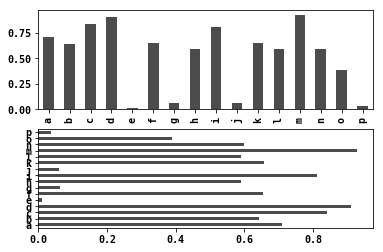

In [23]:
fig, axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [24]:
%matplotlib inline
df = pd.DataFrame(np.random.rand(6,4),
                 index=['one','two','three','four','five','six'],
                 columns=pd.Index(['A','B','C','D'], name='Genus'))
df

Genus,A,B,C,D
one,0.565980,0.162559,0.994786,0.094264
two,0.395706,0.983019,0.006279,0.617671
three,0.449974,0.904357,0.017474,0.858471
four,0.815522,0.984996,0.789212,0.984949
five,0.359175,0.264507,0.373024,0.254887
six,0.950684,0.696543,0.462334,0.902073


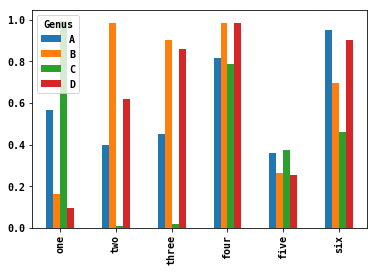

In [25]:
df.plot.bar()

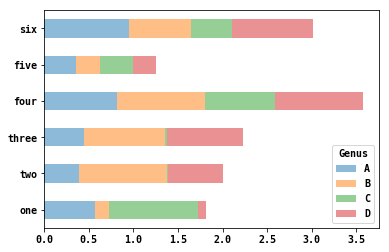

In [26]:
df.plot.barh(stacked=True, alpha=0.5)

In [27]:
tips = pd.read_csv('examples\\tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [28]:
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]

# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


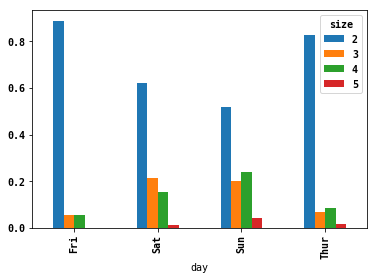

In [29]:
party_pcts.plot.bar()

对于在绘制一个图形之前，需要进行合计的数据，使用seaborn可以减少工作量。

In [30]:
import seaborn as sns

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


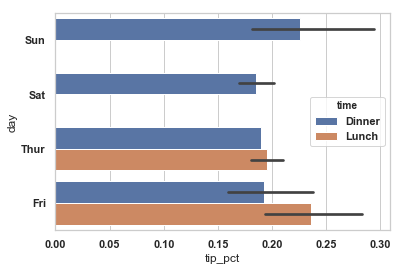

In [32]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
sns.set(style='whitegrid')

### 直方图和密度图

- 直方图（histogram）是一种可以对值频率进行离散化显示的柱状图。数据点被拆分到离散的、间隔均匀的面元中，绘制的是各面元中数据点的数量。
- 密度图，它是通过计算“可能会产生观测数据的连续概率分布的估计”而产生的。一般的过程是将该分布近似为一组核（即诸如正态分布之类的较为简单的分布）。因此，密度图也被称作KDE（Kernel Density Estimate，核密度估计）图。
- 使用plot.kde和标准混合正态分布估计即可生成一张密度图。
- seaborn的distplot方法绘制直方图和密度图更加简单，还可以同时画出直方图和连续密度估计图。

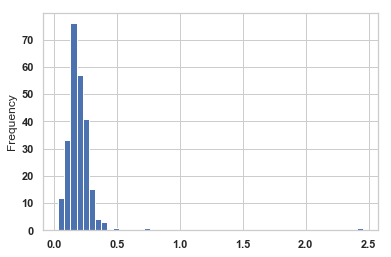

In [31]:
tips['tip_pct'].plot.hist(bins=50)

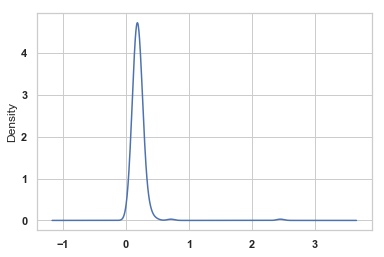

In [32]:
tips['tip_pct'].plot.density()

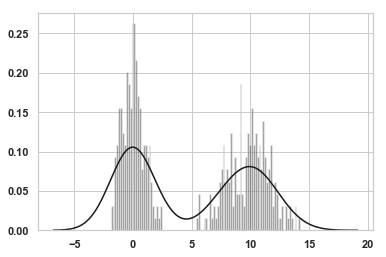

In [33]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### 散点图或点图

- 点图或散布图是观察两个一维数据序列之间的关系的有效手段。
- seaborn提供了一个便捷的pairplot函数， 它支持在对角线上放置每个变量的直方图或密度估计。

In [33]:
macro = pd.read_csv('examples\macrodata.csv')
data = macro[['cpi','m1','tbilrate','unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log m1 versus log unemp ')

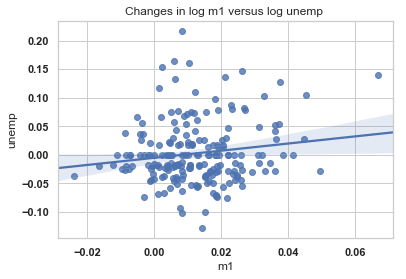

In [35]:
sns.regplot('m1','unemp', data=trans_data)
plt.title('Changes in log %s versus log %s ' % ('m1', 'unemp'))

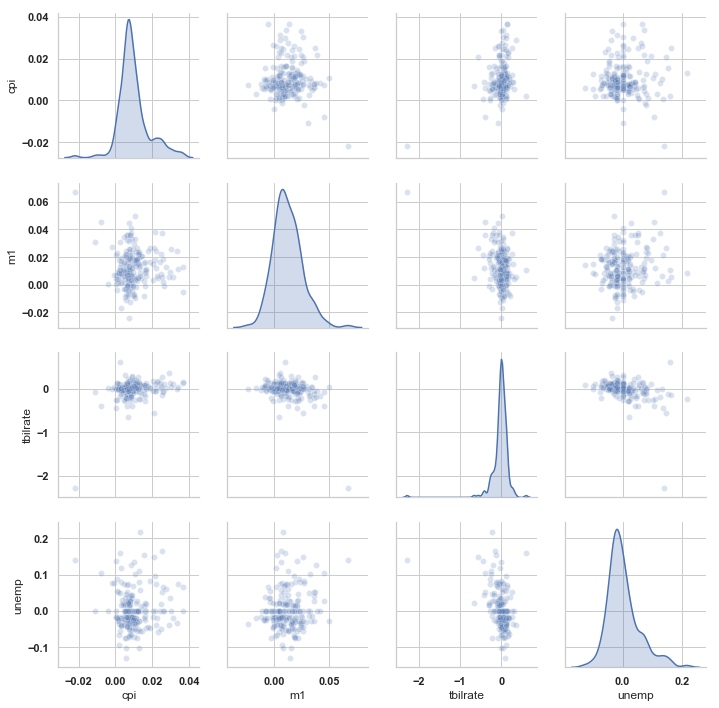

In [36]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha':0.2})

### 分面网格（facet grid）和类型数据

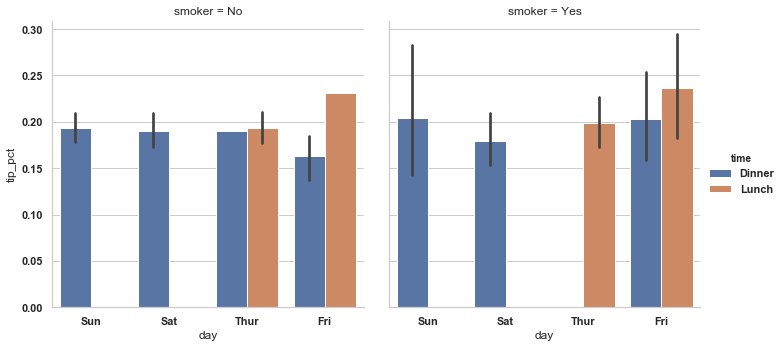

In [38]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
              kind='bar', data=tips[tips.tip_pct < 1])

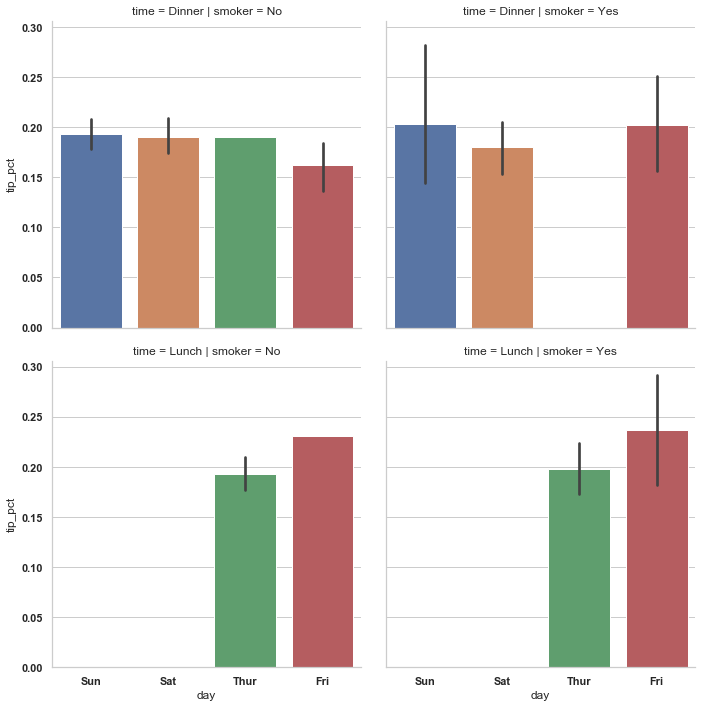

In [39]:
sns.catplot(x='day', y='tip_pct', row='time',
           col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

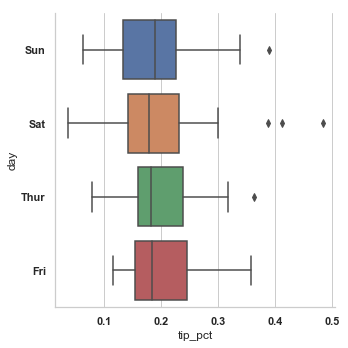

In [40]:
sns.catplot(x='tip_pct', y='day', kind='box',
           data=tips[tips.tip_pct < 0.5])

## 9.3 其他的python可视化工具

许多开发工作都集中在创建交互式图形以便在Web上发布。利用工具如Boken（ https://bokeh.pydata.org/en/latest/） 和
Plotly（ https://github.com/plotly/plotly.py） ，现在可以创建动态交互图形，用于网页浏览器。